## Analyzing Grade Predictions from a Model

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the dataset
original_df = pd.read_pickle('../assets/mads_data_pre.pkl')

# We're also going to define two constant lists: one for the letter grades, and another for their grade points
VALID_GRADES = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'E']
NUMERIC_GRADES = [4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0]

original_df.head()

,Actual,Predicted
0,B+,B
1,A,A
2,B+,B
3,B+,A
4,A-,A


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Now, we need a way to organize this information and get a visual sense of what our model is doing.
# To do so, let's plot the actual grades student's received against the predicted grades. 
# So for example, how many times did our model predict an A grade when the student actually received an A, 
# versus a B, and so forth?

# To do this, we will build a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False):
    # if normalize flag is set then we'll just change the data values through scaling
    if normalize: 
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # now, the plot we're going to show is actually just called imshow, and it's used to show images, or pixel
    # data. This is basically what will be passed in by cm, since it's a square matrix. So we're essentially
    # rendering a bunch of pixels to the screen, a grid of values. 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()  # cmap is the color map we want to use to show values

    # Set annotations
    plt.title('Confusion matrix')
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    # Update the X and Y tick_marks
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.show()


In [25]:
# Ok, we have the mechanis of plotting a square mastrix of values down now. This will come in handy, not just
# here but any time you are interested in looking at a confusion matrix, which is essentially a square matrix
# of your actual values versus predicted values. This helps you identify where error might lie in your model.

# Let's create the matrix, we have a dataframe of results, but we want to now aggregate that into a list of true grades
# versus predicted grades. The library sklearn has a nice function to create this kind of matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(original_df['Actual'], original_df['Predicted'])
cm

array([[54062,  2972,  6218,   793,     0,   527,    24,     0,     0,
            0,     0,     0],
       [25494,  2808,  5881,   467,     0,   764,    20,     0,     0,
            0,     0,     0],
       [ 9889,  2860,  6991,   545,     0,  1445,   111,     0,     0,
            0,     0,     0],
       [15387,  2702,  6210,   915,     0,  1030,    31,     0,     0,
            0,     0,     0],
       [ 3753,  1642,  4330,   172,     0,  1269,   109,     0,     0,
            0,     0,     0],
       [  972,   894,  2207,    18,     0,  1338,   128,     0,     0,
            0,     0,     0],
       [ 1426,   912,  2429,    27,     0,  1150,   123,     0,     0,
            0,     0,     0],
       [  352,   452,   971,     9,     0,   676,    75,     0,     0,
            0,     0,     0],
       [  116,   182,   408,     0,     0,   331,    56,     0,     0,
            0,     0,     0],
       [  100,   166,   325,     1,     0,   280,    36,     0,     0,
            0,     0

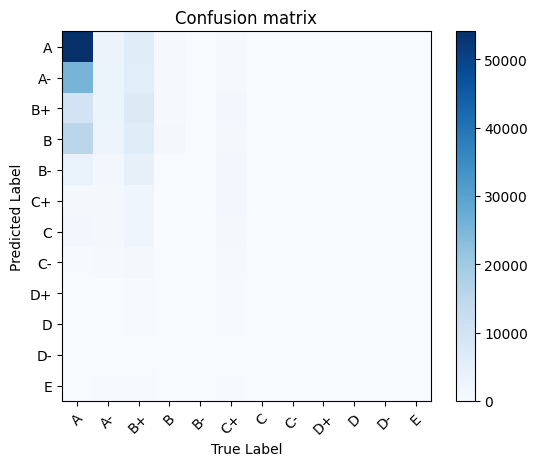

In [26]:
# Use the plotting function
plot_confusion_matrix(cm, VALID_GRADES)

In [23]:
# Notice that regardless of the number of true labels, we almost always predict that a student will receive 
# either an A- or an A! Lets take a look at the frequencies of our data
original_df.groupby('Actual').apply(len)


Actual
A     64596
A-    35434
B     21841
B+    26275
B-    11275
C      5557
C+     6067
C-     2535
D      1093
D+      908
D-      375
E      1256
dtype: int64

In [18]:
# We see that the dataset there are way more A grade predictions when compared to any other grade. Why is that?



## Visualizing Distributions: Quantile-Quantile Plots

So to try and figure out why this is happening, let's start running some **diagnostics** and try to get a better understanding regarding our underlying data. Specifically, we're going to make a Q-Q plot which stands for a Quantile-Quantile plot.

Now, from the box plots and violin plots discussions you should be familiar now with quantiles which are points separate out 25 percent or one-quarter of the data. Quantiles also known as percentiles are just a generalization of this idea. So the 0.5 quantile would be the 50th percentile and so half of the data would live below or above this point. 
The formula to create a Q-Q plot is as follows. 
1. First, we order our n data points in an ascending order. So we're making each point its own quantile. 
2. Next, we evenly divide a normal distribution into n plus one segments each with an equal amount of area. 
3. Then we compute the Z values for each of these cutoff points and these are what we call the theoretical quantiles. 
4. Then we plot the actual quantiles from step one against the theoretical quantiles in step three. 

Now, the open textbook I've shared has discussions of this under the term quantile normal plot. Since they're specifically interested in checking whether a given set of data is normally distributed and I call these QN plots.

Just reflecting for a moment on these four steps, it actually means that you are creating a scatter plot where one dimension is the normal distribution and the other is your actual distribution. This means that a straight line of points means that your data follows the same distribution. If you want to see this in more detail, here's a couple of additional videos that describe this statistics. But for the rest of this demonstration, I want to show you how to write the code to do this in matplotlib. 

In [33]:
original_df.head()

,Actual,Predicted
0,B+,B
1,A,A
2,B+,B
3,B+,A
4,A-,A


In [32]:
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))
grade_dist = original_df.replace({'Actual' : grade_point_dict})['Actual']

grade_dist.head()

0    3.3
1    4.0
2    3.3
3    3.3
4    3.7
Name: Actual, dtype: float64

<Axes: >

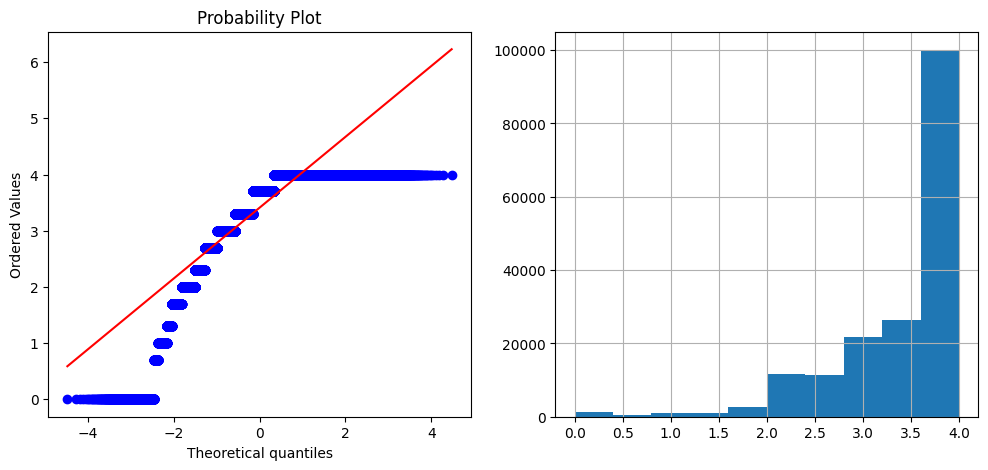

In [34]:
# We won't need to manually go through the process described, instead we can just use the
# probability plot library from scipy.stats

import scipy.stats as stats

# Now we get plots like this we want to convert our letter grades into numeric equivilents,
# so lets just create a mapping dictionary.
grade_point_dict = dict(zip(VALID_GRADES, NUMERIC_GRADES))

# And now let's apply that dictionary to our dataframe, replacing values as appropriate
grade_dist = original_df.replace({'Actual' : grade_point_dict})['Actual']

# We're going to create two plots here on two different axes
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# Ok, now we can pass this list of grades into stats.probplot(). This function takes the distribution
# we want to compare against, and we'll use stats.norm for a normal distribution, and a location for the plot,
# and we';; indicate that we want it on the first axis, ax1
stats.probplot(grade_dist, dist=stats.norm, plot=ax1)

# Now ;et's plot next to it a histogram of the grades. Pandas plotting also can take an axis to just drop a
# plot, and this is why understanding matplotlib is important. 
grade_dist.hist(ax=ax2)


((array([3.91140092e-06, 9.49430356e-06, 1.51373201e-05, ...,
         1.10983549e+01, 1.15648233e+01, 1.24516169e+01]),
  array([0., 0., 0., ..., 4., 4., 4.])),
 (0.4447921960602982, 2.9639916817366982, 0.6281903103810003))

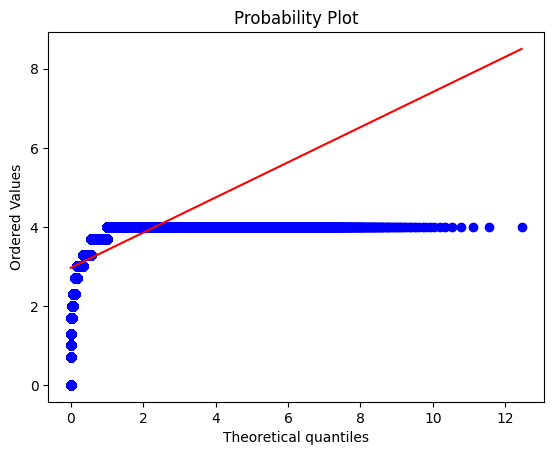

In [35]:
# Maybe the data is an exponential distribution instead? 

# Run another probplot()
stats.probplot(grade_dist, dist=stats.expon, plot=plt.gca())


Nope, this is not it.

So our model is unable to predict other types of grades reliably. In other words, if we just predicted that everybody would get an A, we'd actually have pretty good accuracy. Even though that wouldn't make for very intriguing or useful predictive model. To combat this, we can try and balance out data in our dataset and we do this through under-sampling.

Now, you're going to learn more about different sampling techniques in a later course. But this is essentially just means that we're reducing the size of our dataset so that each class that we're looking at to predict, the letter grade, has basically the same number of students in it. Actually, it's not quite this simple. We used a technique called SMOTE. You can read about this if you're interested. The synthetic minority oversampling technique, to generate a bunch of fake data for model training. But let's leave all that for the future and let's just stick with under-sampling. So let's read our new predictions after building the model.


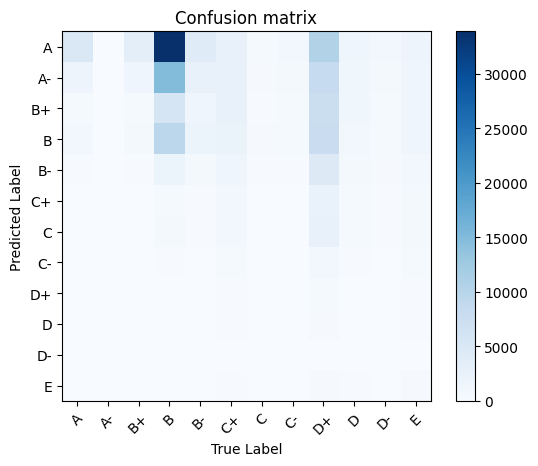

In [36]:
# So, let's read in our new prediction after building this new model
processed_df = pd.read_pickle('../assets/mads_data_post.pkl')

# Lets turn that into a confusion matrix
cm = confusion_matrix(processed_df['Actual'], processed_df['Predicted'])

# Plot it
plot_confusion_matrix(cm, VALID_GRADES)

<Axes: >

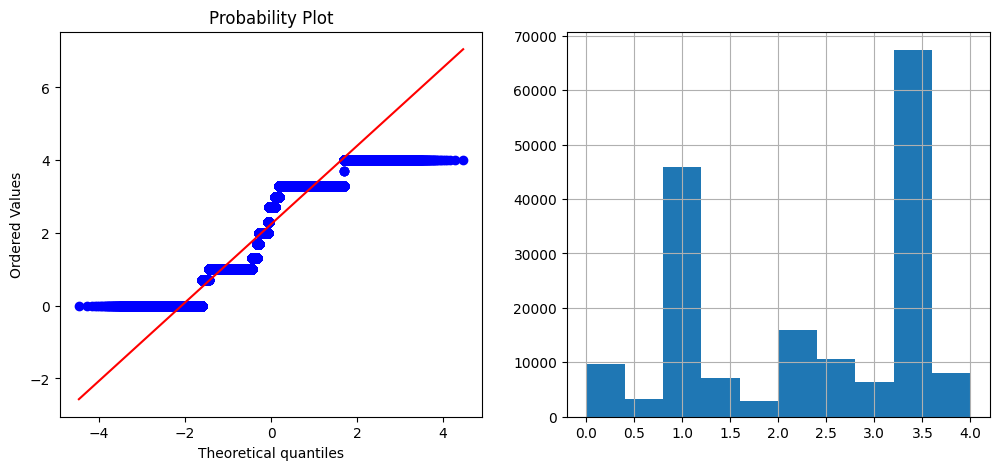

In [37]:
# We see that we get a much more broad range values. And now we can plot a Q-Q plot of our 
# predicted grades and take a look at how it stacks up to the normal distribution.

# Let's make sure we are looking at the predicted grades distribution this time
grade_dist = processed_df.replace({'Predicted' : grade_point_dict})['Predicted']

# And we'll copy and paste out plotting code
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# And let's put up a probability plot
stats.probplot(grade_dist, dist=stats.norm, plot=ax1)

#  Plot the histogram
grade_dist.hist(ax=ax2)

In [38]:
# So we see that while not exactly normally distributed, this set of grades does cover a larger area. 